# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(city_url).json()
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = weather_response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_response["coord"]["lat"]
        city_lng = weather_response["coord"]["lon"]
        city_max_temp = weather_response["main"]["temp_max"]
        city_humidity = weather_response["main"]["humidity"]
        city_clouds = weather_response["clouds"]["all"]
        city_wind = weather_response["wind"]["speed"]
        city_country = weather_response["sys"]["country"]
        city_date = weather_response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
 

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | boguchany
Processing Record 3 of Set 1 | coquimbo
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | san quintin
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | rodrigues alves
Processing Record 20 of Se

Processing Record 33 of Set 4 | berlevag
Processing Record 34 of Set 4 | cabo san lucas
Processing Record 35 of Set 4 | clyde river
Processing Record 36 of Set 4 | qui nhon
Processing Record 37 of Set 4 | maceio
Processing Record 38 of Set 4 | jacareacanga
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | moron
Processing Record 41 of Set 4 | bjelovar
Processing Record 42 of Set 4 | eyl
Processing Record 43 of Set 4 | kaka
Processing Record 44 of Set 4 | play cu
City not found. Skipping...
Processing Record 45 of Set 4 | fare
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | simpsonville
Processing Record 49 of Set 4 | pontes e lacerda
Processing Record 0 of Set 5 | bonfim
Processing Record 1 of Set 5 | ballina
Processing Record 2 of Set 5 | minab
Processing Record 3 of Set 5 | teguise
Processing Record 4 of Set 5 | glubokoe
City not found. Skipping...
Processing Record 5 of Set 5 | marienburg
Processing 

Processing Record 20 of Set 8 | lingdong
Processing Record 21 of Set 8 | umm kaddadah
Processing Record 22 of Set 8 | grand gaube
Processing Record 23 of Set 8 | san nicolas
Processing Record 24 of Set 8 | vostok
Processing Record 25 of Set 8 | mwinilunga
Processing Record 26 of Set 8 | iqaluit
Processing Record 27 of Set 8 | amderma
City not found. Skipping...
Processing Record 28 of Set 8 | picayune
Processing Record 29 of Set 8 | sudova vyshnya
Processing Record 30 of Set 8 | komsomolskiy
Processing Record 31 of Set 8 | dongsheng
Processing Record 32 of Set 8 | umm durman
City not found. Skipping...
Processing Record 33 of Set 8 | okhotsk
Processing Record 34 of Set 8 | kalevala
Processing Record 35 of Set 8 | klaksvik
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | cubara
Processing Record 38 of Set 8 | maicao
Processing Record 39 of Set 8 | provideniya
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | akyab
Processing Record 42 of S

Processing Record 8 of Set 12 | churapcha
Processing Record 9 of Set 12 | tianpeng
Processing Record 10 of Set 12 | kutum
Processing Record 11 of Set 12 | gangotri
City not found. Skipping...
Processing Record 12 of Set 12 | port macquarie
Processing Record 13 of Set 12 | iquitos
Processing Record 14 of Set 12 | tilichiki
Processing Record 15 of Set 12 | batagay
Processing Record 16 of Set 12 | mlonggo
Processing Record 17 of Set 12 | mandera
Processing Record 18 of Set 12 | kirakira
Processing Record 19 of Set 12 | san luis
Processing Record 20 of Set 12 | nelson bay
Processing Record 21 of Set 12 | tabukiniberu
City not found. Skipping...
Processing Record 22 of Set 12 | selimpasa
Processing Record 23 of Set 12 | isetskoye
Processing Record 24 of Set 12 | sept-iles
Processing Record 25 of Set 12 | bull savanna
Processing Record 26 of Set 12 | worland
Processing Record 27 of Set 12 | kadoma
Processing Record 28 of Set 12 | caravelas
Processing Record 29 of Set 12 | olean
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,12.18,83,0,1.34,US,1679078159
1,boguchany,58.3814,97.4531,0.21,90,100,4.03,RU,1679078160
2,coquimbo,-29.9533,-71.3436,22.85,64,0,6.17,CL,1679078100
3,norman wells,65.2820,-126.8329,-20.98,65,75,1.03,CA,1679078160
4,rikitea,-23.1203,-134.9692,26.39,74,97,7.10,PF,1679078161


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,12.18,83,0,1.34,US,1679078159
1,boguchany,58.3814,97.4531,0.21,90,100,4.03,RU,1679078160
2,coquimbo,-29.9533,-71.3436,22.85,64,0,6.17,CL,1679078100
3,norman wells,65.2820,-126.8329,-20.98,65,75,1.03,CA,1679078160
4,rikitea,-23.1203,-134.9692,26.39,74,97,7.10,PF,1679078161


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

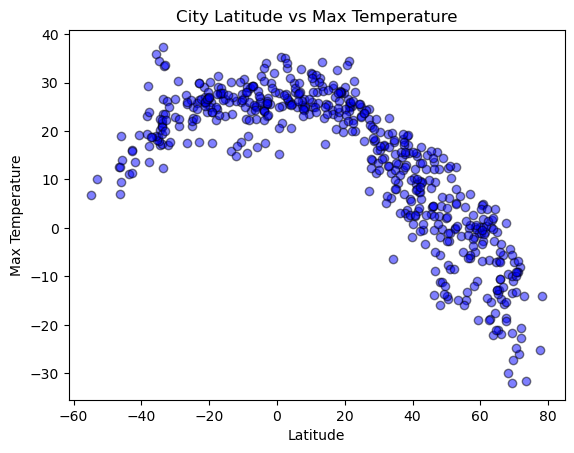

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"].astype(float), city_data_df["Max Temp"].astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude vs Max Temperature")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

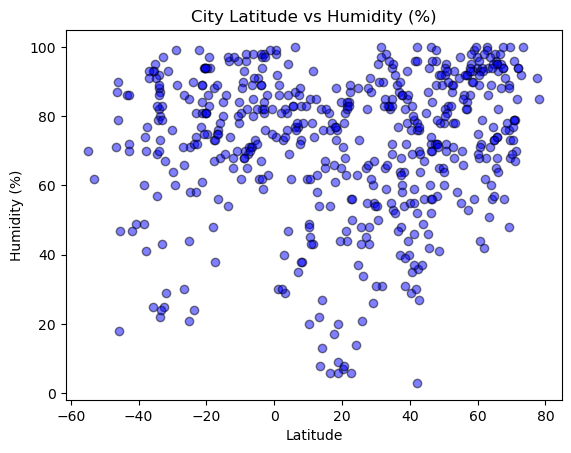

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"].astype(float), city_data_df["Humidity"].astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

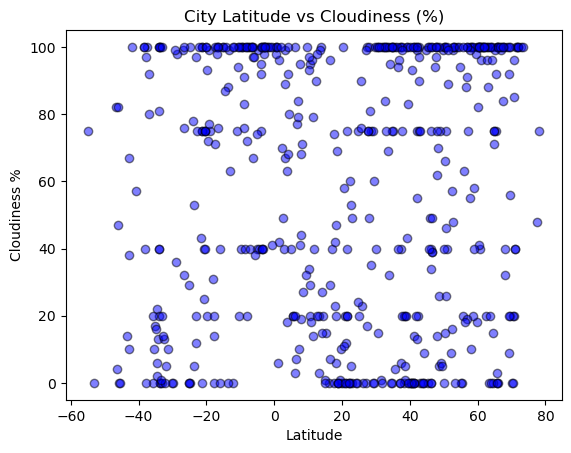

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"].astype(float), city_data_df["Cloudiness"].astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs Cloudiness (%)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

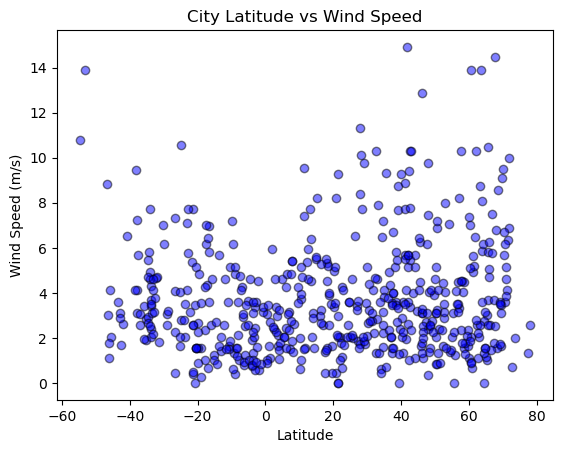

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"].astype(float), city_data_df["Wind Speed"].astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"].astype(float) > 0, :]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,12.18,83,0,1.34,US,1679078159
1,boguchany,58.3814,97.4531,0.21,90,100,4.03,RU,1679078160
3,norman wells,65.2820,-126.8329,-20.98,65,75,1.03,CA,1679078160
5,salalah,17.0151,54.0924,27.05,78,40,2.57,OM,1679078161
6,albany,42.6001,-73.9662,9.21,76,100,3.36,US,1679078162


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"].astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,coquimbo,-29.9533,-71.3436,22.85,64,0,6.17,CL,1679078100
4,rikitea,-23.1203,-134.9692,26.39,74,97,7.10,PF,1679078161
8,saint-philippe,-21.3585,55.7679,25.77,84,100,0.41,RE,1679078163
9,souillac,-20.5167,57.5167,26.21,94,75,1.54,MU,1679078163
14,rodrigues alves,-7.7380,-72.6509,24.11,69,100,1.01,BR,1679078166


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8962899563362805


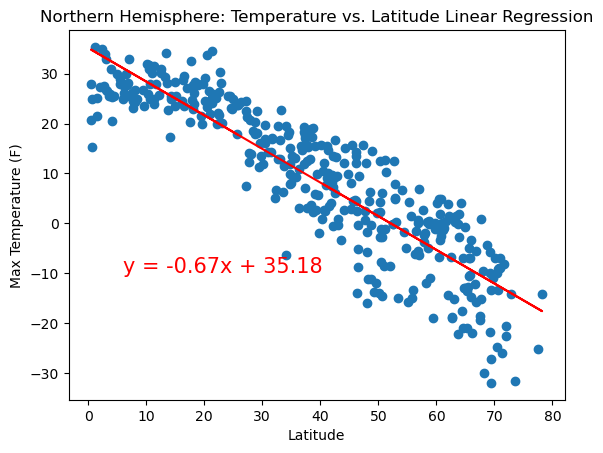

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Max Temp"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Temperature vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.5206521290809778


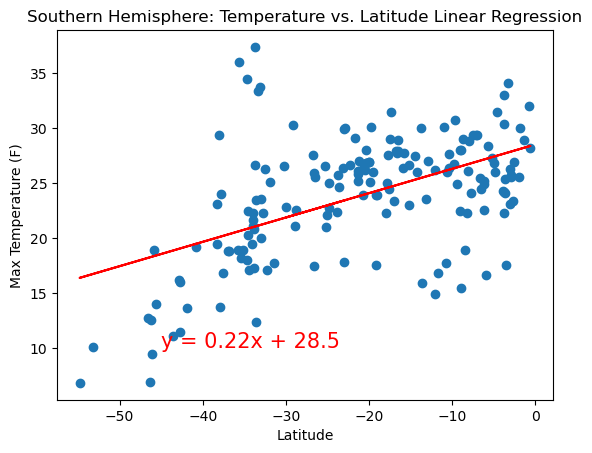

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Max Temp"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Temperature vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
#print("The regression displays a negative correlation.")
#print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")

plt.show()

**Discussion about the linear relationship:** 

For the Northern Hemisphere, the regression displays a negative correlation between max temperature and latitude. Which means that in the nothern hemisphere, as you move away from the equator the temperature decreases. Therefore, maximum temperature is achieved closer to the equator.

For the Southern Hemisphere, the regression displays a positive correlation between max temperature and latitude. Which means, as you get closer to the equator, the temperature increases.

Therfore, it must be concluded that max temperatures are achieved closer to the equator, and minimum temperatures are achieved at the poles of both the northern and southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.31402002884988667


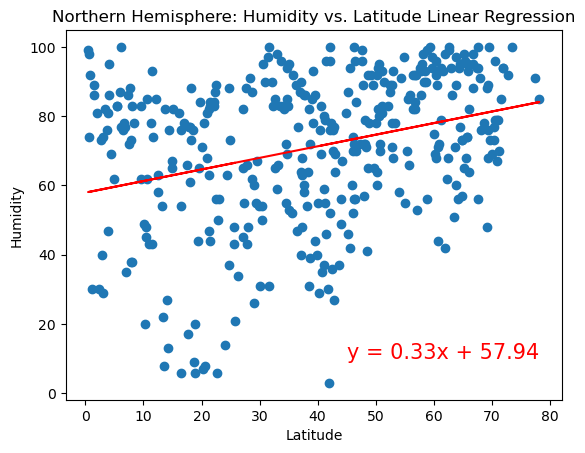

In [18]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Humidity"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")

The r-value is: 0.26074065855621614


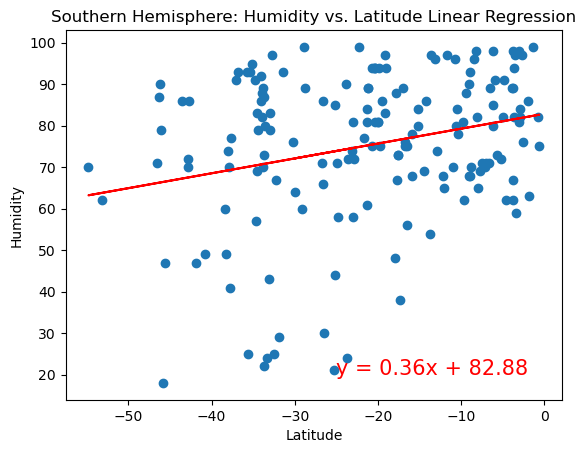

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Humidity"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the northern hemisphere there does not appear to be much of a correlation between latitude and humidity however in the souther hemisphere there is more of a correlation. For locations south of the hemisphere, the closer to the equator the more humid the climate.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1840166031795093


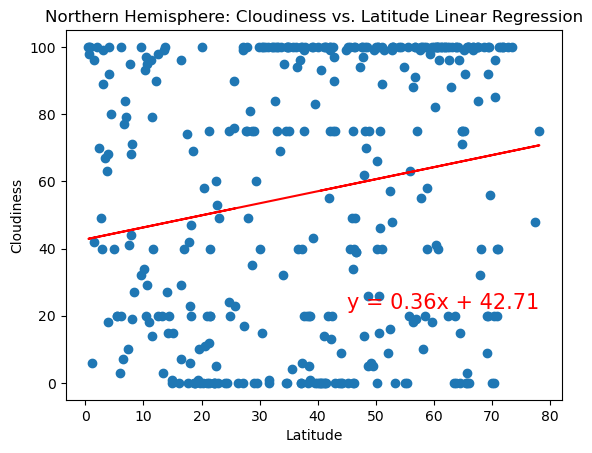

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Cloudiness"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")

The r-value is: 0.40565636379271924


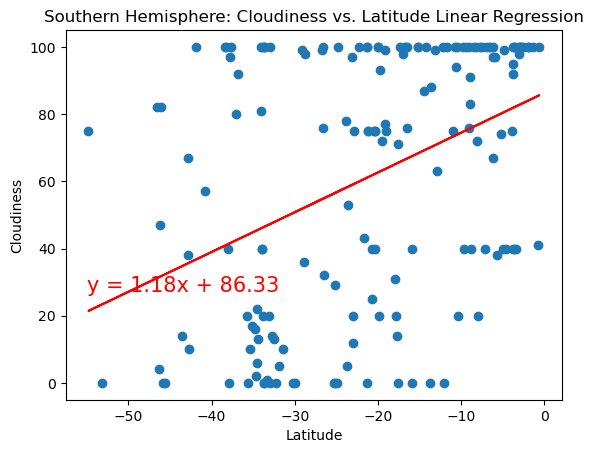

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Cloudiness"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,27),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the northern hemisphere there does not appear to be much of a correlation between latitude and cloudiness however in the souther hemisphere there is more of a correlation although it is still low. In the southern hemisphere the closer to the equator the more cloudiness percentage. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13667767138704623


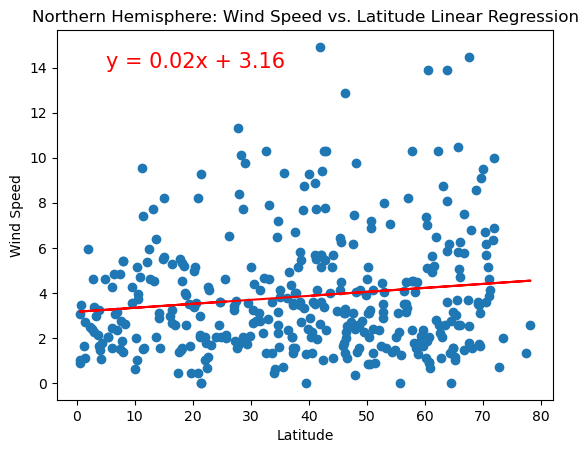

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Wind Speed"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")

The r-value is: -0.3537255021628128


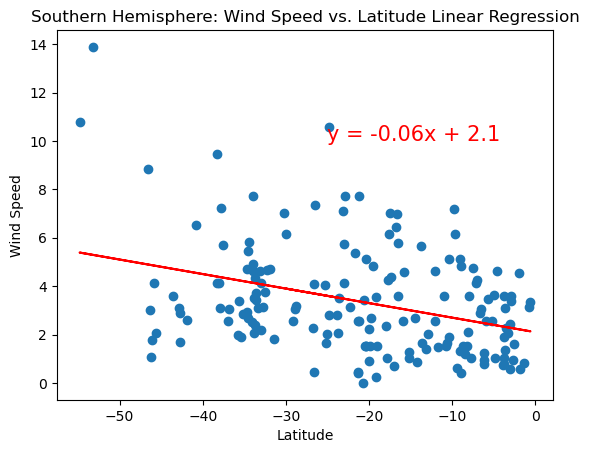

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Wind Speed"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the northern hemisphere there is very little correlation between latitude and windspeed but the correlation is positive. Meaning, very generally, the higher the latitude the higher the windspeed.

In the southern hemisphere there is also very little correlation between latitude and wind speed, the correlation is negative which shows that the closer to the equator the lower the wind speed is, generally speaking.